<a href="https://colab.research.google.com/github/Murdocksilva/Data-Science---Coder-House/blob/main/FINAL_DATASCIENCE1_MARRERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   ENTREGA FINAL
#### Data Science I - Coderhouse




## Modelo para aprobación de créditos  bancarios



### Integrantes:
Alfonso Marrero Silva

### Origen del dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

###### Este es un dataset para predecir aprobaciones de préstamos bancarios.

Los bancos buscan la disminución del riesgo al momento de emitir préstamos, por lo tanto, nos encontramos con un dataset de variables creemos relevantes para el modelo como lo son los activos, el nivel educativo, los ingresos, las cargas,  entre otras. Estas variables son indispensables para predecir la solvencia en sus clientes.

##### Recordemos que la incapacidad de pago es el mayor riesgo que tiene el emisor de préstamos, es decir, la banca, por lo tanto, La solución debe estar dirigida hacia un modelo que prediga la emisión de préstamos que conlleven al menor riesgo de impago posible.


#Preguntas o Hipótesis de interés sobre el dataset

1. ¿existen correlaciones significativas entre las diferentes variables?
2. ¿como se distribuyen estas variables?
3. ¿como se relaciona el total de activos del solicitante y el monto del préstamo solicitado?
4. ¿como es la relación de ingresos del solicitante con el monto del préstamo?
5. ¿cuales son las medias, maximos, desviaciones y modas de las variables numéricas?
6. ¿que variables son más relevantes al modelo?
7. ¿es posible tener un modelo seguro y robusto con el dataset que estoy trabajando?
8. ¿será mi modelo de aprendizaje supervisado capaz de clasificar con precisión las instancias para dar resultados mas precisos?
9. si el indice CIBIL representa teóricamente la solvencia de los solicitantes ¿será como creemos considerado tan relevante a la hora de aprobar un préstamo?






## Dependencias:


In [521]:
!pip install mlxtend

In [522]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import metrics
import warnings
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [523]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Adquisición de datos

##Github - archivo csv

In [524]:
url = 'https://raw.githubusercontent.com/Murdocksilva/Data-Science---Coder-House/main/loan_approval_dataset.csv'
df = pd.read_csv(url)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Descripción de variables



*   no_of_dependents = número de dependientes del solicitante. >=0
*   education = nivel educativo del solicitante [Graduate : graduado , Not Graduate : no graduado]
*   self_employed = trabajador por su propia cuenta [Yes : independiente , No : no independiente]
*   income_annum = ingreso anual. >0
*   loan_amount = monto del préstamo. >0
*   loan_term = meses plazo del préstamo. >0
*   cibil_score = puntaje de solvencia crediticia de los ultimos 6 meses. A mayor puntaje mayor solvencia del solicitante [300,900]
*   residential_assets_value = valor de los activos residenciales. considera deudas hipotecarias.
*   commercial_assets_value = valor de los activos comerciales.
*   luxury_assets_value = valor de los activos de lujo.
*   bank_asset_value = valor de los activos bancarios.
*   loan_status = estado del préstamo. variable target [Approved : aprobado , Rejected : rechazado]

### Entendiendo ahora las variables que tenemos podemos decir a primera vista que el ingreso anual , el valor de los activos y el indice cibil podrían ser variables importantes en mi modelo.

















# Descriptiva

In [525]:
df.shape

(4269, 13)

El dataset obtenido de la base de datos posee 4269 filas y 13 columnas, de las cuales 12 (doce) son variables independientes a analizar y 1 (una) corresponde a la variable target o dependiente

In [526]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

venos el nombre de las columnas del dataset


In [527]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [528]:
df.duplicated().value_counts()

False    4269
Name: count, dtype: int64

El dataset no posee filas repetidas.

In [529]:
df.isna() .sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [530]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


El dataset no posee valores nulos/perdidos , pero el nombre de las columnas contiene un espacio en blanco "" antes del nombre.

In [531]:
df.columns = [col.strip() for col in df.columns]

for col in df.columns:
    print(f"'{col}': {type(col)}")

'loan_id': <class 'str'>
'no_of_dependents': <class 'str'>
'education': <class 'str'>
'self_employed': <class 'str'>
'income_annum': <class 'str'>
'loan_amount': <class 'str'>
'loan_term': <class 'str'>
'cibil_score': <class 'str'>
'residential_assets_value': <class 'str'>
'commercial_assets_value': <class 'str'>
'luxury_assets_value': <class 'str'>
'bank_asset_value': <class 'str'>
'loan_status': <class 'str'>


eliminamos el espacio en blanco "" antes de cada nombre.



In [532]:
print(df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


verifico que el tipo de datos en cada columna siga siendo el correcto

In [533]:
df.describe(include = 'object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


Resumen descriptivo de las variables no numéricas

In [534]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Resumen descriptivo de las variables numéricas. Traspongo para la mejor visualización de los resultados.

In [535]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

medias = df[columnas_numericas].mean()

print(medias.to_string(float_format='{:,.0f}'.format))

no_of_dependents                    2
income_annum                5,059,124
loan_amount                15,133,450
loan_term                          11
cibil_score                       600
residential_assets_value    7,472,617
commercial_assets_value     4,973,155
luxury_assets_value        15,126,306
bank_asset_value            4,976,692


Calculamos la media de las variables numéricas. Podemos decir que en promedio los préstamos son de 11 meses, que en promedio el solicitante tiene 2 dependencias, que el monto promedio de préstamo solicitado es de tres veces el ingreso anual promedio.

In [536]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

moda = df[columnas_numericas].mode().iloc[0]

print("Moda:")
print(moda.to_string(float_format='{:,.0f}'.format))

Moda:
no_of_dependents                    4
income_annum                7,000,000
loan_amount                10,600,000
loan_term                           6
cibil_score                       348
residential_assets_value      400,000
commercial_assets_value             0
luxury_assets_value         2,900,000
bank_asset_value            1,400,000


Calculamos la moda.



In [537]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

maximo = df[columnas_numericas].max()

print(maximo.to_string(float_format='{:,.0f}'.format))

no_of_dependents                   5
income_annum                 9900000
loan_amount                 39500000
loan_term                         20
cibil_score                      900
residential_assets_value    29100000
commercial_assets_value     19400000
luxury_assets_value         39200000
bank_asset_value            14700000


Calculamos los máximos de las variables numéricas


In [538]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

mediana_ = df[columnas_numericas].median()

print(mediana_.to_string(float_format='{:,.0f}'.format))


no_of_dependents                    3
income_annum                5,100,000
loan_amount                14,500,000
loan_term                          10
cibil_score                       600
residential_assets_value    5,600,000
commercial_assets_value     3,700,000
luxury_assets_value        14,600,000
bank_asset_value            4,600,000


Calculamos la mediana de las variables numéricas

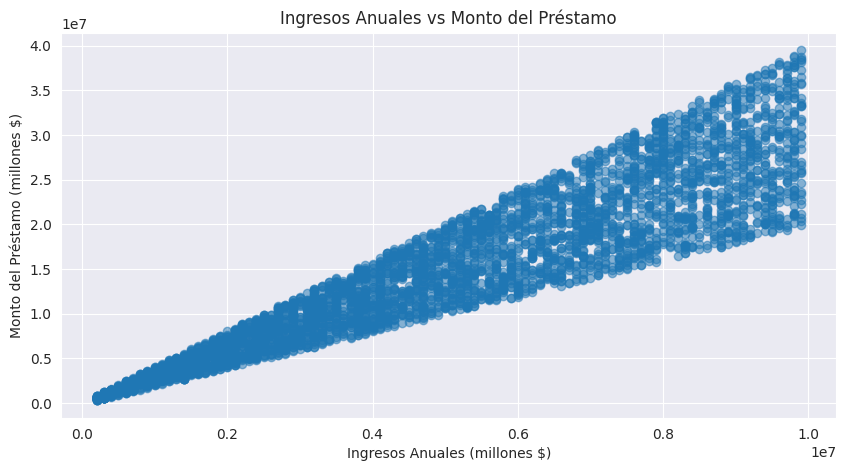

In [539]:
plt.figure(figsize=(10, 5))
plt.scatter(df['income_annum'], df['loan_amount'], alpha=0.5)
plt.title('Ingresos Anuales vs Monto del Préstamo')
plt.xlabel('Ingresos Anuales (millones $)')
plt.ylabel('Monto del Préstamo (millones $)')
plt.show()

Podemos ver la relación entre los montos de los préstamos y el ingreso anual de los solicitantes. a mayor ingreso mayores son los montos.

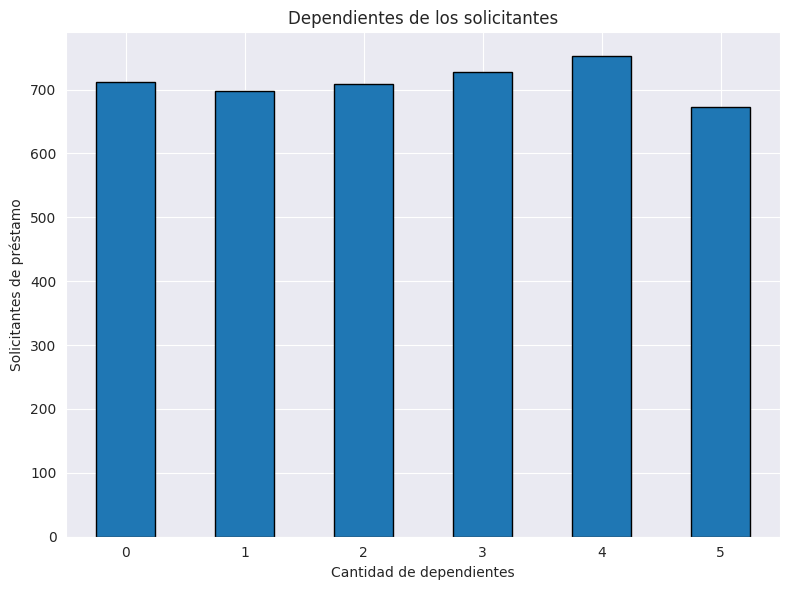

In [540]:
df['no_of_dependents'] = df['no_of_dependents'].astype('category')
ordered_dependents = df['no_of_dependents'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ordered_dependents.plot(kind='bar', edgecolor='black')
plt.title('Dependientes de los solicitantes')
plt.xlabel('Cantidad de dependientes')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Podemos ver que el número de cargas o dependencias de los solicitantes es bastante pareja entre sí respecto a la totalidad de solicitudes, es posible que sea una variable poco relevante para el modelo.

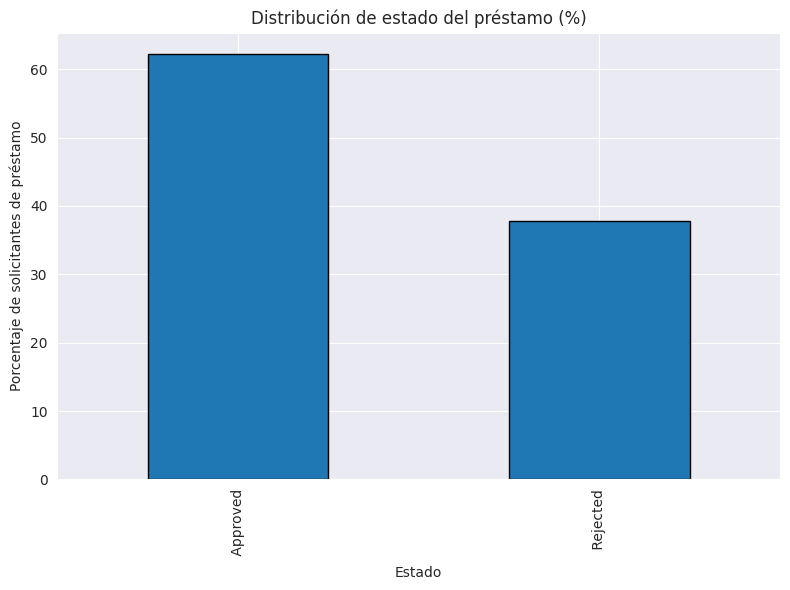

In [541]:
plt.figure(figsize=(8, 6))
df['loan_status'].value_counts(normalize=True).mul(100).plot(kind='bar', edgecolor='black')
plt.title('Distribución de estado del préstamo (%)')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de solicitantes de préstamo')
plt.tight_layout()
plt.show()

vemos la relación % entre aprobados(>60%) y rechazados(<40%)

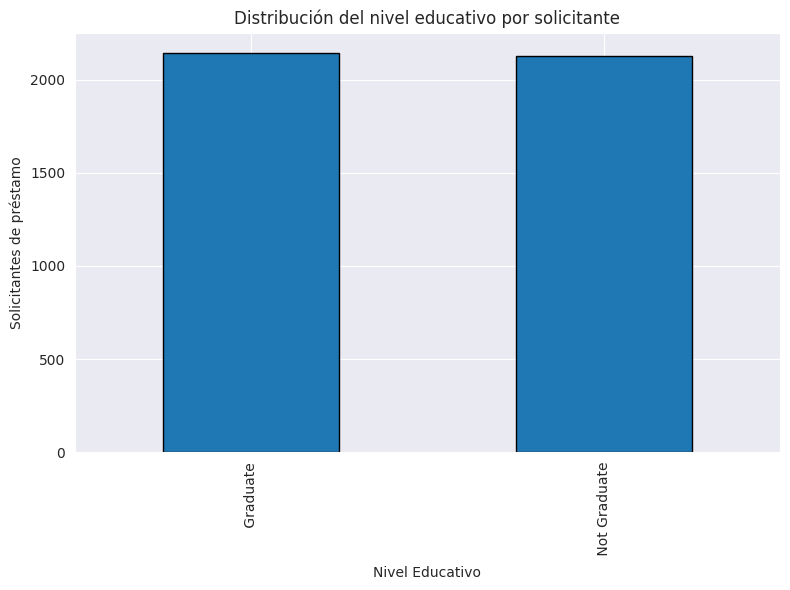

In [542]:
plt.figure(figsize=(8, 6))
df['education'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del nivel educativo por solicitante')
plt.xlabel('Nivel Educativo')
plt.ylabel('Solicitantes de préstamo')
plt.tight_layout()
plt.show()

Podemos ver que la cantidad de graduados y no graduados es pareja, es posible que sea una variable poco relevante para el modelo.


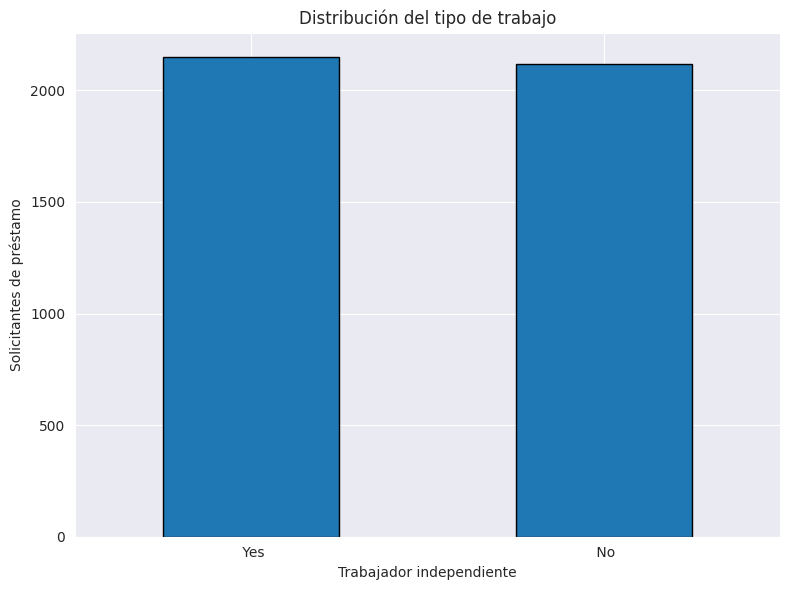

In [543]:
plt.figure(figsize=(8, 6))
df['self_employed'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del tipo de trabajo')
plt.xlabel('Trabajador independiente')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Vemos que la cantidad de trabajadores dependientes e independientes es bastante pareja tambien, es posible que sea una variable poco relevante para el modelo.

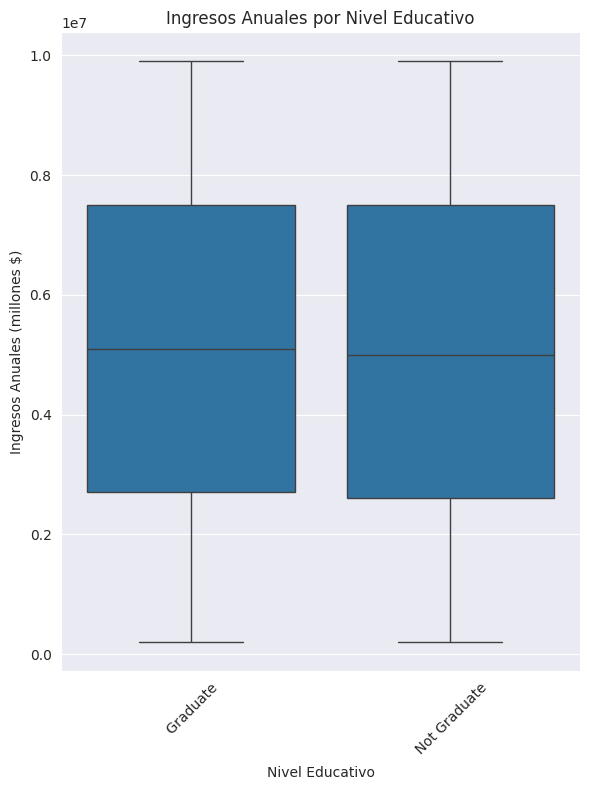

In [544]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='education', y='income_annum', data=df)
plt.title('Ingresos Anuales por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que los niveles de ingreso entre graduados y no graduados son practicamente los mismos.  

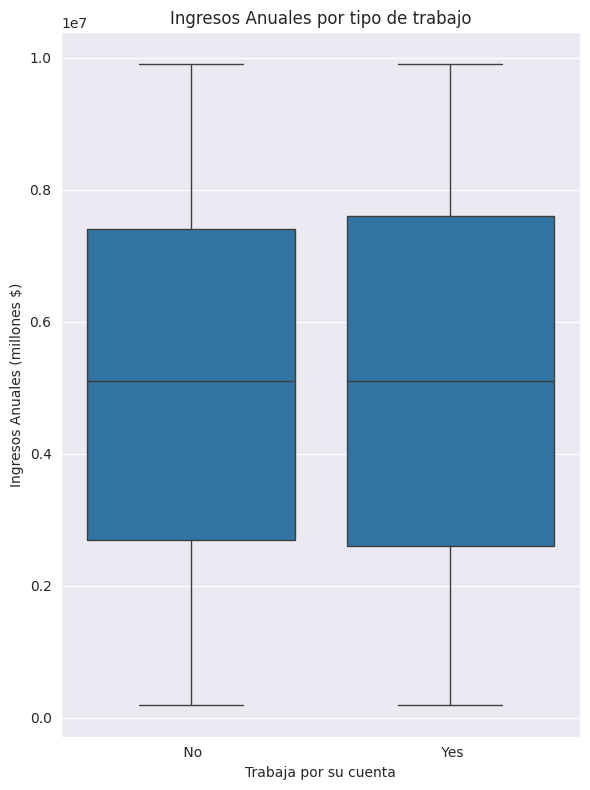

In [545]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='self_employed', y='income_annum', data=df)
plt.title('Ingresos Anuales por tipo de trabajo')
plt.xlabel('Trabaja por su cuenta')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Podemos ver que los niveles de ingreso entre trabajadores independientes y dependientes son practicamente los mismos. Los que trabajan por su cuenta, es decir, los independientes pueden tener un nivel de ingreso mas elevado

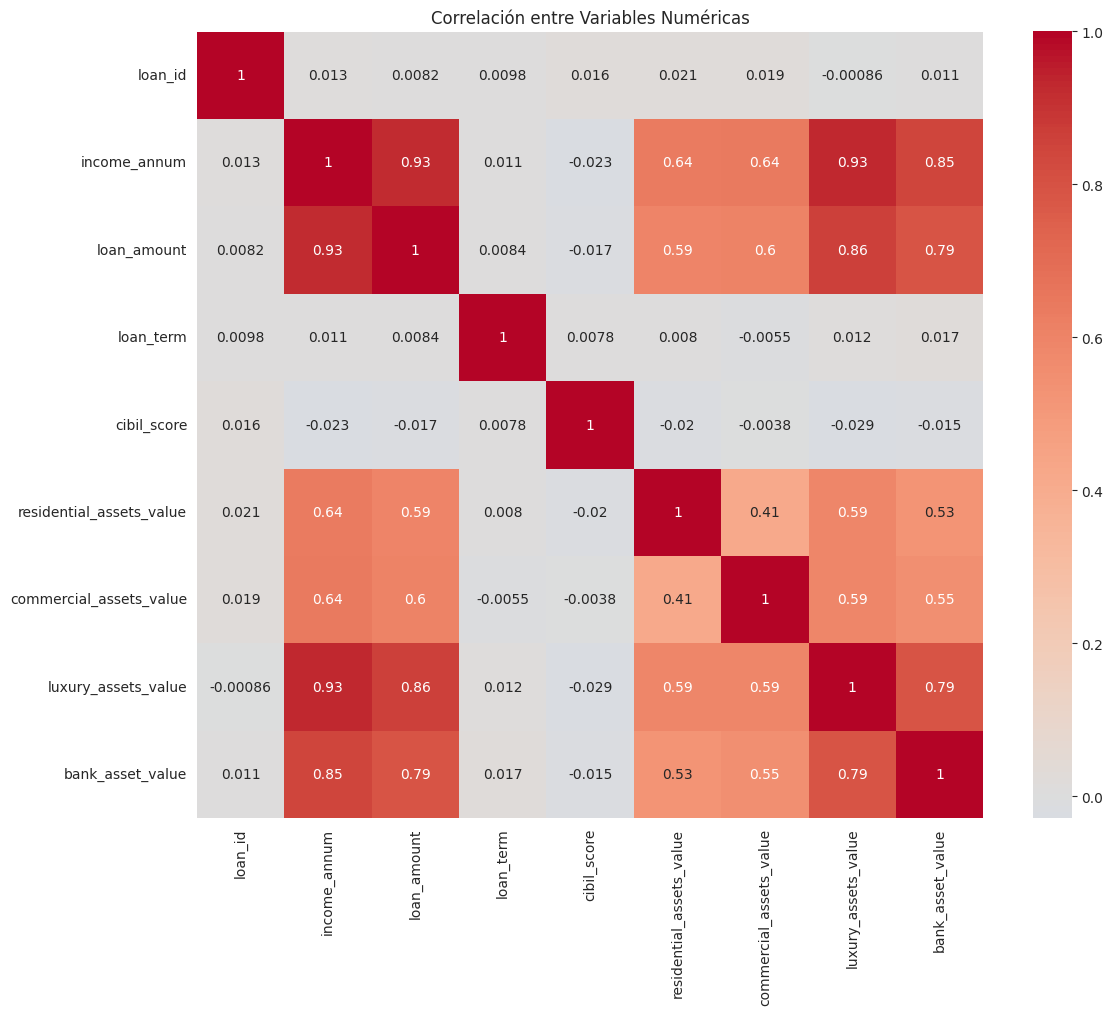

In [546]:
correlaciones = df.select_dtypes(include=['int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

Vemos la correlación entre las variables numéricas del dataset. Notamos la alta correlación de algunas variables (ingreso anual, activos de lujo) sobre los montos de los préstamos.

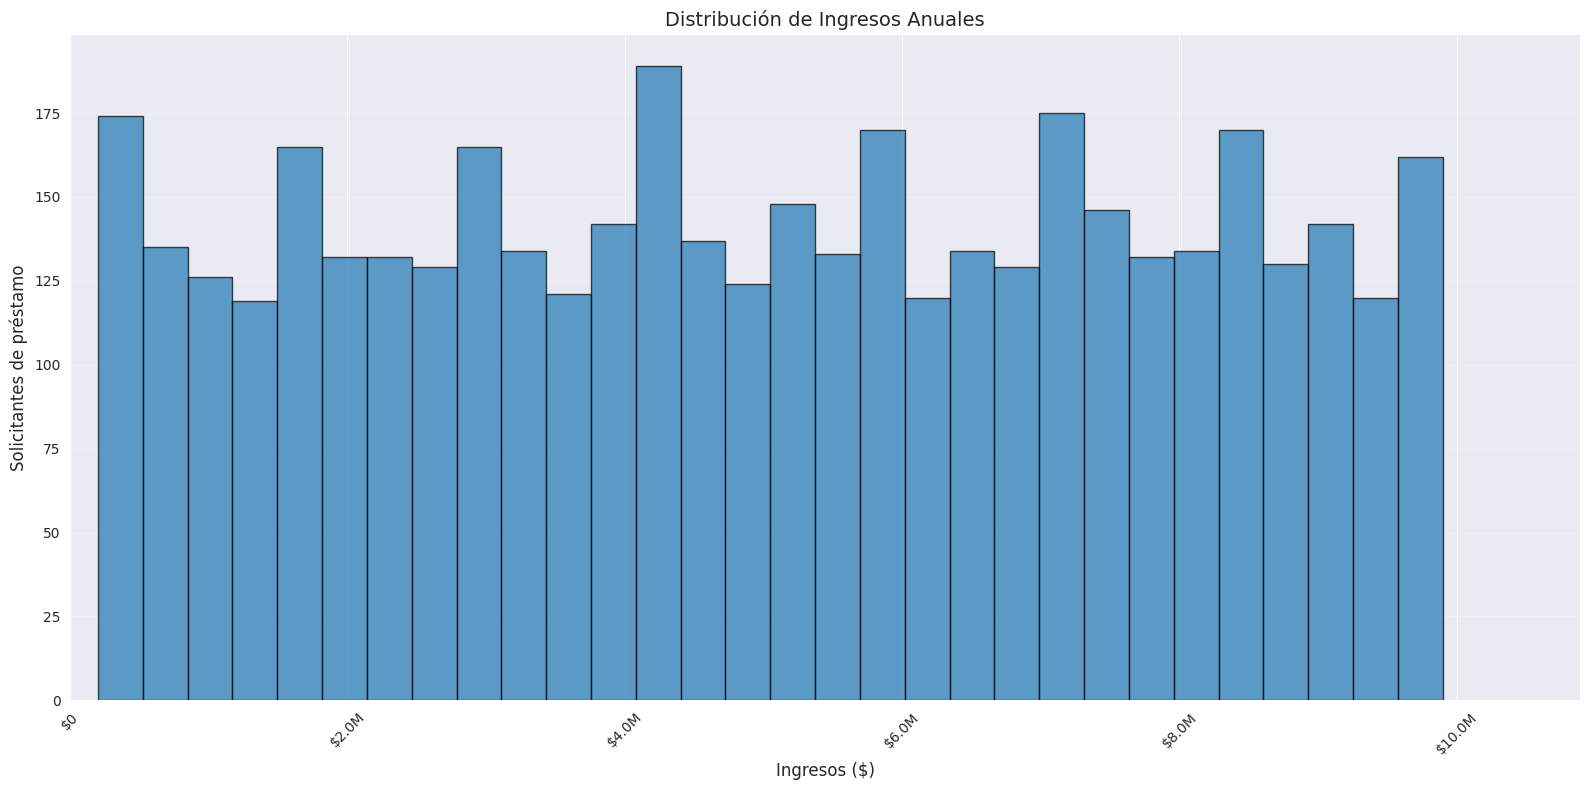

In [547]:
plt.figure(figsize=(16, 8))
plt.hist(df['income_annum'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Ingresos Anuales', fontsize=14)
plt.xlabel('Ingresos ($)', fontsize=12)
plt.ylabel('Solicitantes de préstamo', fontsize=12)
plt.grid(axis='y', alpha=0.3)

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)

max_income = df['income_annum'].max()
plt.xlim(0, max_income * 1.1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La Distribución del ingreso entre los solicitantes es muy pareja. se realizaron mejoras visuales para el eje X y los datos que suministra.

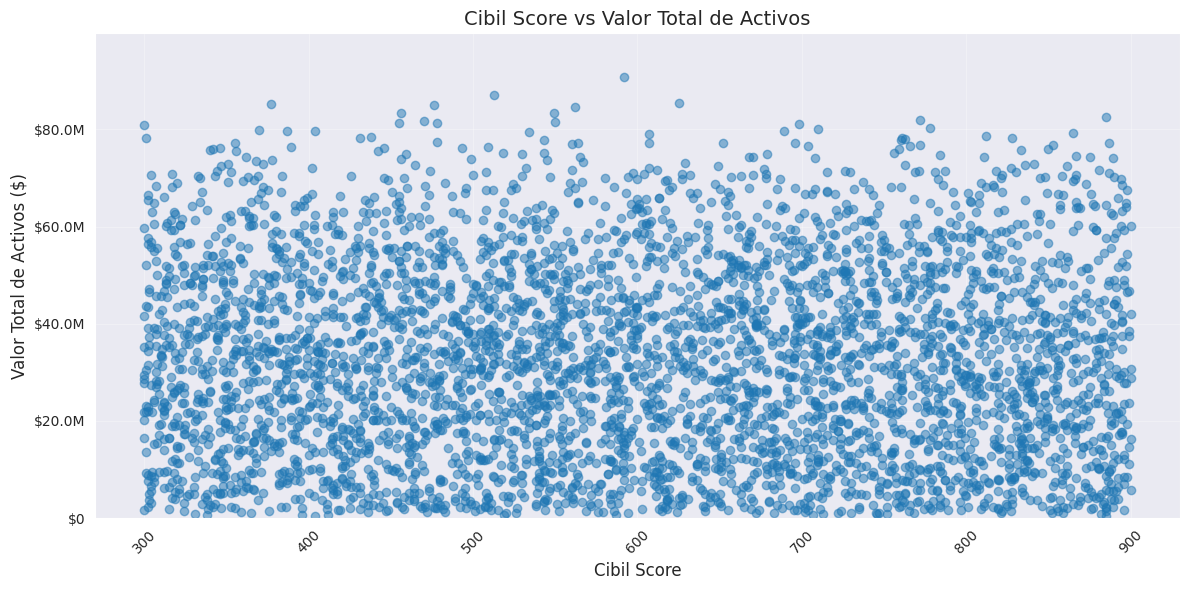

In [548]:
df['total_assets'] = (df['residential_assets_value'] +
                    df['commercial_assets_value'] +
                    df['luxury_assets_value'] +
                    df['bank_asset_value'])

plt.figure(figsize=(12, 6))
plt.scatter(df['cibil_score'], df['total_assets'], alpha=0.5)
plt.title('Cibil Score vs Valor Total de Activos', fontsize=14)
plt.xlabel('Cibil Score', fontsize=12)
plt.ylabel('Valor Total de Activos ($)', fontsize=12)

def currency(x, pos):
    if x >= 1e9:
        s = '${:1.1f}B'.format(x*1e-9)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ticklabel_format(style='plain', axis='x')
max_assets = df['total_assets'].max()
plt.ylim(0, max_assets * 1.1)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Creamos la variable Total de activos. Comparamos esta con el índice cibil.

Podemos ver mucha dispersión en los datos, es posible que el total de activos no sea relevante a la hora de definir el índice cibil.


In [549]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets'],
      dtype='object')

vemos nuevamente las columnas de mi modelo y verificamos la creación de "Total de activos"

### Limpiamos los espacios en blanco al principio y al final de los valores de las columnas object

In [550]:
df['loan_status'] = df['loan_status'].str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()


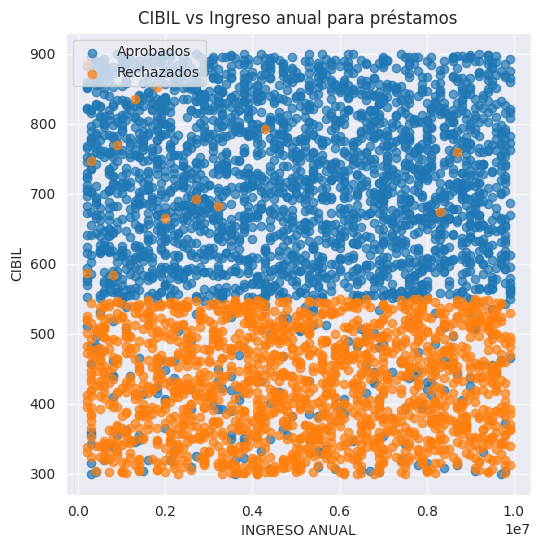

In [551]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['loan_status']=='Approved']['income_annum'], df[df['loan_status']=='Approved']['cibil_score'], alpha=0.7)
ax.scatter(df[df['loan_status']=='Rejected']['income_annum'], df[df['loan_status']=='Rejected']['cibil_score'], alpha=0.7)
ax.set_title('CIBIL vs Ingreso anual para préstamos')
ax.set_xlabel('INGRESO ANUAL')
ax.set_ylabel('CIBIL')
ax.legend(['Aprobados', 'Rechazados'], loc='upper left')

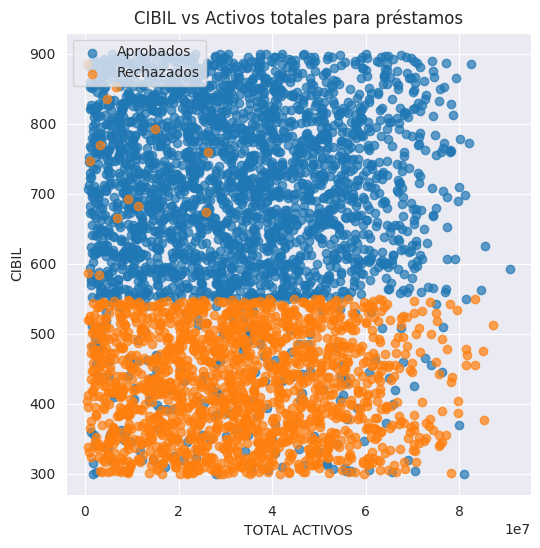

In [552]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['loan_status']=='Approved']['total_assets'], df[df['loan_status']=='Approved']['cibil_score'], alpha=0.7)
ax.scatter(df[df['loan_status']=='Rejected']['total_assets'], df[df['loan_status']=='Rejected']['cibil_score'], alpha=0.7)
ax.set_title('CIBIL vs Activos totales para préstamos')
ax.set_xlabel('TOTAL ACTIVOS')
ax.set_ylabel('CIBIL')
ax.legend(['Aprobados', 'Rechazados'], loc='upper left')

Podemos decir que el indice cibil es una variable relevante para la decisión de aceptación o rechazo de préstamos. Vemos marcada lo que parece ser una linea de decisión donde < 550 cibil incluye la mayoría de los rechazos de préstamos.

In [553]:
corr_coeff = df['income_annum'].corr(df['total_assets'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.9318445049474519


In [554]:
corr_coeff = df['income_annum'].corr(df['loan_amount'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.9274699109871487


In [555]:
corr_coeff = df['income_annum'].corr(df['cibil_score'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: -0.023034421699860145


calculamos la correlación entre algunas variables en caracter informativo y de análisis.

# Regresión logística

features = X <br>
target = y

In [556]:
df_approved = df[df['loan_status'] == 'Approved']

definimos nuestra variable target : Préstamos aprobados



In [557]:
X = df[['income_annum','loan_amount','cibil_score','total_assets']]

In [558]:
y = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})

In [559]:
y = y.values.astype(int)

In [560]:
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (4269, 4)
Forma de y: (4269,)


In [561]:
print("Clases únicas en y:", np.unique(y))

Clases únicas en y: [0 1]


### Creo la instancia del modelo y lo entreno

In [562]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [563]:
X2= X.values
y2=y


# PCA

mi variable X contiene más de 2 componentes, aplico PCA.


In [564]:
df_2 = df[['income_annum','cibil_score','loan_amount','total_assets']]
df_2.head()

,income_annum,cibil_score,loan_amount,total_assets
0,9600000,778,29900000,50700000
1,4100000,417,12200000,17000000
2,9100000,506,29700000,57700000
3,8200000,467,30700000,52700000
4,9800000,382,24200000,55000000


In [565]:
modelo_pca = PCA(n_components=4)
modelo_pca.fit(df_2)

PCA(n_components=4)

Entrenamos el modelo

In [566]:
modelo_pca.components_

array([[ 1.25442168e-01, -1.85141212e-07,  3.85603618e-01,
         9.14097430e-01],
       [ 1.10149006e-01,  3.44322916e-07,  9.10265840e-01,
        -3.99103115e-01],
       [ 9.85967271e-01, -2.35069258e-06, -1.50751284e-01,
        -7.17118653e-02],
       [ 2.30300364e-06,  1.00000000e+00, -5.96404192e-07,
         1.38084904e-07]])

In [567]:
modelo_pca.explained_variance_ratio_[0]

0.9614251447163555

In [568]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,income_annum,cibil_score,loan_amount,total_assets
PC1,0.125442,-1.851412e-07,3.856036e-01,9.140974e-01
PC2,0.110149,3.443229e-07,9.102658e-01,-3.991031e-01
PC3,0.985967,-2.350693e-06,-1.507513e-01,-7.171187e-02
PC4,0.000002,1.000000e+00,-5.964042e-07,1.380849e-07


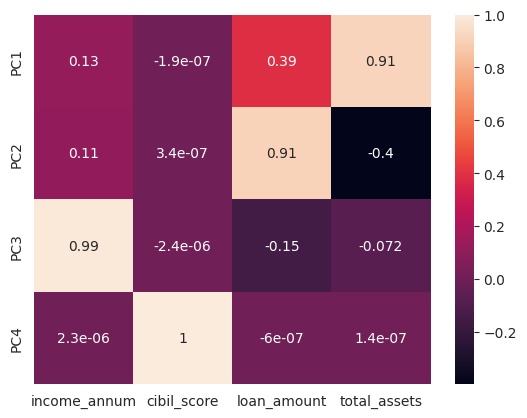

In [569]:
ax = sns.heatmap(componentes, annot=True)

In [570]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[96.  4.  0.  0.]


Vemos la varianza explicada de cada componente

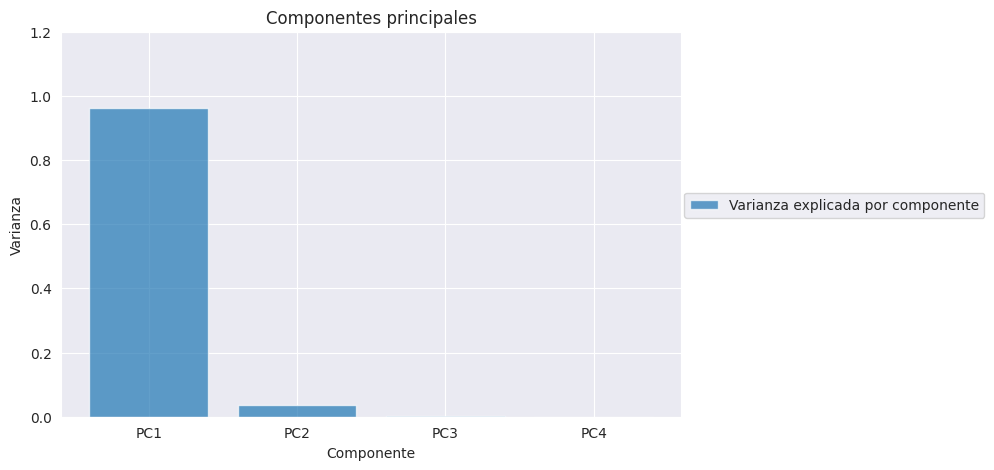

In [572]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [573]:
proyecciones = pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,2.285564e+07,6.697446e+06,9.494203e+05,182.221182
1,-1.546455e+07,3.429696e+06,6.115879e+05,-185.542445
2,2.911448e+07,3.666597e+06,-1.539609e+04,-89.844444
3,2.481670e+07,6.473244e+06,-6.949586e+05,-132.203976
4,2.461341e+07,-1.851826e+05,1.697535e+06,-209.324948
...,...,...,...,...
4264,-2.844624e+07,-2.092007e+06,-2.640390e+05,-288.102970
4265,-1.316966e+07,1.325029e+06,-2.566453e+05,-44.433829
4266,9.458212e+06,5.563896e+06,-3.635417e+05,-143.955297
4267,-4.446843e+06,-7.335609e+05,-3.250628e+05,178.729115


Luego de aplicar transform guardamos en un dataframe

In [574]:
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

Descarto las variables nuevas PC3 y PC4. Nos quedamos con PC1 y PC2 que parecen explicar mejor las decisiones de aprobación de préstamos. PC2 contiene el indice CIBIL y basado en nuestros análisis anteriores creo relevante incluirlo enel modelo.

In [575]:
proyecciones

,PC1,PC2
0,2.285564e+07,6.697446e+06
1,-1.546455e+07,3.429696e+06
2,2.911448e+07,3.666597e+06
3,2.481670e+07,6.473244e+06
4,2.461341e+07,-1.851826e+05
...,...,...
4264,-2.844624e+07,-2.092007e+06
4265,-1.316966e+07,1.325029e+06
4266,9.458212e+06,5.563896e+06
4267,-4.446843e+06,-7.335609e+05


In [576]:
proyecciones['loan_status'] = df['loan_status']
proyecciones

,PC1,PC2,loan_status
0,2.285564e+07,6.697446e+06,Approved
1,-1.546455e+07,3.429696e+06,Rejected
2,2.911448e+07,3.666597e+06,Rejected
3,2.481670e+07,6.473244e+06,Rejected
4,2.461341e+07,-1.851826e+05,Rejected
...,...,...,...
4264,-2.844624e+07,-2.092007e+06,Rejected
4265,-1.316966e+07,1.325029e+06,Approved
4266,9.458212e+06,5.563896e+06,Rejected
4267,-4.446843e+06,-7.335609e+05,Approved


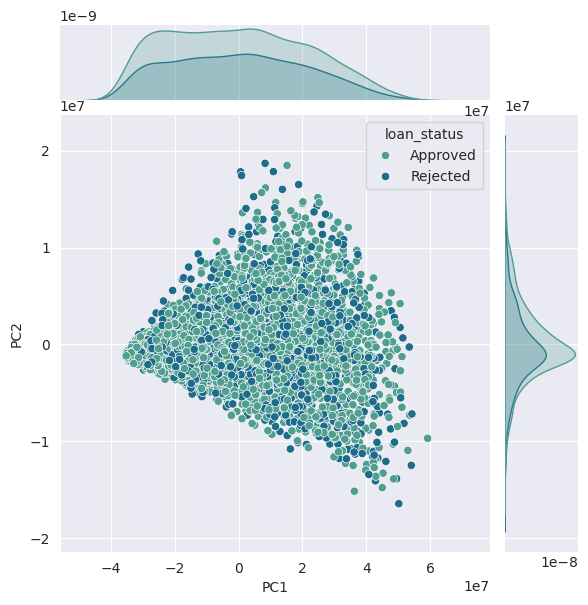

In [577]:
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="loan_status", palette="crest")
g.fig.set_figwidth(6)

Graficamos la distribución de los valores en las dos variables PC1 y PC2


In [578]:
proyecciones.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Estan levemente balanceadas

In [580]:
scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(df_2)

In [581]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_2_scaled)

In [582]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

Plasmamos las variables de PCA en un dataframe

In [583]:
X = df_pca[['PC1', 'PC2']]

Definimos X para la regresión logistica

In [584]:
y = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [586]:
modelo = LogisticRegression(random_state=2)
modelo.fit(X_train, y_train)

LogisticRegression(random_state=2)

Entrenamos el modelo

In [587]:
y_pred = modelo.predict(X_test)

Test

In [588]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")


Exactitud del modelo: 0.92


# La exactitud del 0.92 es bastante alta, esto viene siendo un buen resultado para el modelo desde el punto de vista predictivo.


In [589]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       324
           1       0.94      0.93      0.94       530

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



Tanto la precisión como el recall están bien balanceados para ambas clases (0 y 1), lo que indica que el modelo está funcionando bien para ambas categorías.

El f1-score, que es la media armónica de precisión y recall, es alto para ambas clases (0.90 y 0.94), lo que confirma el buen rendimiento general.

In [590]:
print("\nCoeficientes del modelo:")
print("PC1:", modelo.coef_[0][0])
print("PC2:", modelo.coef_[0][1])


Coeficientes del modelo:
PC1: -0.026165786003228827
PC2: -3.6084078660643977


PC2 tiene un coeficiente mucho mayor (-3.61) que PC1 (-0.03), lo que se refleja en su importancia relativa (99.28% vs 0.72%).

Esto sugiere que PC2, que está fuertemente relacionada con el cibil_score, es el factor más determinante en la clasificación

In [591]:
print("\nIntercept:")
print(modelo.intercept_[0])


Intercept:
1.5188174952165745


In [592]:
importancia = np.abs(modelo.coef_[0])
importancia_relativa = importancia / np.sum(importancia)
print("\nImportancia relativa de las características:")
print("PC1:", importancia_relativa[0])
print("PC2:", importancia_relativa[1])


Importancia relativa de las características:
PC1: 0.007199134893949309
PC2: 0.9928008651060507


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


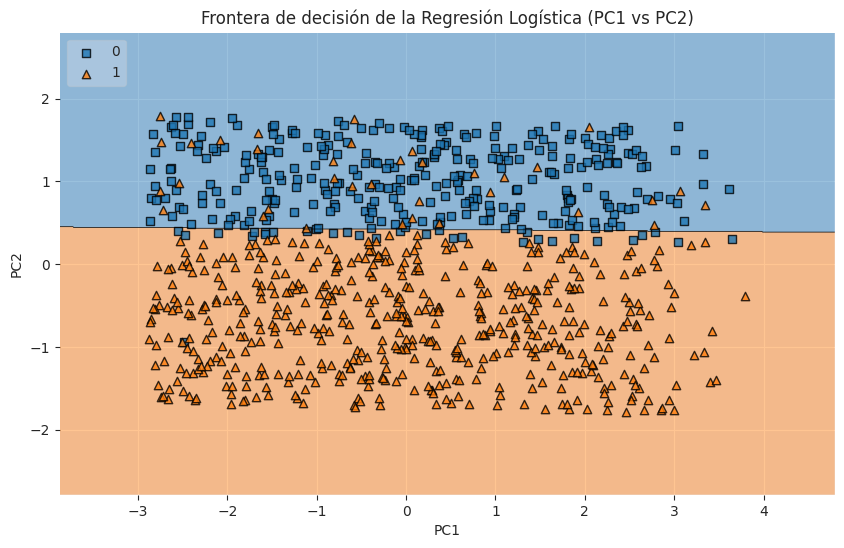

In [593]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test.values, y_test.values, clf=modelo, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Frontera de decisión de la Regresión Logística (PC1 vs PC2)')
plt.show()

In [594]:
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente principal:
[0.70466086 0.24982176 0.03324569 0.01227169]


PC1 y PC2 juntas explican el 95.45% de la varianza en los datos, lo que justifica su uso para el modelo.

In [595]:
print("\nMatriz de componentes principales:")
print(pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_2.columns))


Matriz de componentes principales:
                   PC1       PC2       PC3       PC4
income_annum  0.585911 -0.010194 -0.023770  0.809962
cibil_score  -0.020170 -0.999781 -0.005256  0.001853
loan_amount   0.572343 -0.016057  0.719466 -0.393109
total_assets  0.573345 -0.008724 -0.694101 -0.435227


El cibil_score (representado principalmente por PC2) parece ser el factor más crucial para determinar si un préstamo será aprobado o rechazado.

Aunque PC1 (que representa una combinación de ingresos, monto del préstamo y activos totales) explica la mayor parte de la varianza en los datos, tiene menos influencia en la decisión final del préstamo.

El modelo logra un buen equilibrio entre identificar correctamente tanto las aprobaciones como los rechazos de préstamos.

# KNN

En la busqueda de mejorar los resultados de mi modelo pasamos rapidamente a aplicar KNN con las variables PC1 y PC2, así podré comparar ambos resultados y mantener el que prediga con menor error o en deifnitiva mayor probabilidad de acertación.

Exactitud del modelo KNN: 0.95

Informe de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       324
           1       0.99      0.92      0.96       530

    accuracy                           0.95       854
   macro avg       0.94      0.96      0.95       854
weighted avg       0.95      0.95      0.95       854



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


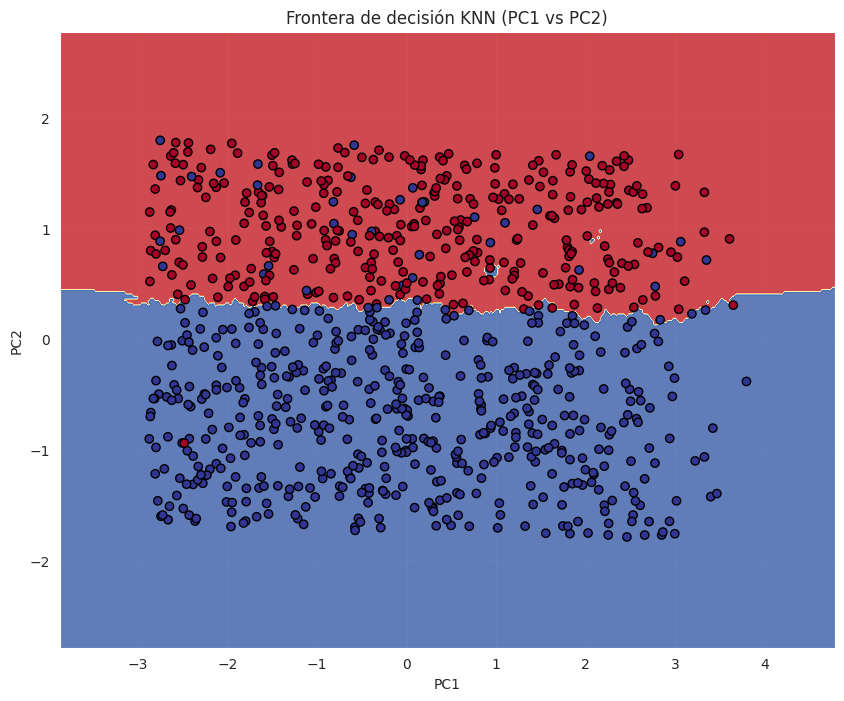


Comparación de rendimiento:
Exactitud de Regresión Logística: 0.92
Exactitud de KNN: 0.95


In [596]:
X = df_pca[['PC1', 'PC2']]
y = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud del modelo KNN: {accuracy_knn:.2f}")

print("\nInforme de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

# Frontera de decisión
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test.values, y_test.values, knn, 'Frontera de decisión KNN (PC1 vs PC2)')

print("\nComparación de rendimiento:")
print(f"Exactitud de Regresión Logística: {accuracy:.2f}")
print(f"Exactitud de KNN: {accuracy_knn:.2f}")

Vemos que los resultados del modelo KNN son buenos y mejores que los de la regresión logística.


##Comparación y análisis:
KNN: 0.95 vs Regresión Logística: 0.92


El modelo KNN ha superado ligeramente a la regresión logística en términos de exactitud general y parece tener un mejor balance entre precisión y recall para ambas clases (aprobado | rechazado).

Para préstamo rechazado: KNN tiene un recall mucho más alto (0.98 vs 0.90), lo que significa que identifica correctamente casi todos los préstamos que deberían ser rechazados.

Para préstamo aprobado: KNN tiene una precisión más alta (0.99 vs 0.94), lo que indica que cuando predice una aprobación, es casi siempre correcto.

# He podido responder todas las preguntas e hipótesis que me había planteado en un principio. Los objetivos han sido cumplidos, he logrado un modelo robusto que logre con poco error predecir aprobaciones de préstamos bancarios. Trasladando este trabajo hacia un ejemplo corporativo hoy en día se pudiese decir que con un nivel bajo de riesgo una banca especifica pudiese considerar este modelo para aprobar préstamos a solicitantes, y que esto conlleve a la tranquilidad del emisor ya que sus clientes con gran probabilidad serán solventes. Esto, por ende, implica un menor riesgo para su negocio.

####Gracias!


Alfonso Marrero Silva